## SLI Training Script 
## By Luis A. Urso
## 27-JAN-2023 - version 1
##

In [5]:
import csv
import os
import sys
import numpy as np
import tensorflow as tf
import pydot
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

RANDOM_SEED = 42

# Setup Global Variables

 Define the files path

In [6]:
dataset = 'model/training_data.csv'
model_save_path = 'model/training_classifierf.hdf5'
tflite_save_path = 'model/training_classifier.tflite'

def get_script_path():
    return os.path.dirname(os.path.realpath(sys.argv[0]))


app_path=get_script_path()

Set number of classes

In [8]:
# Define the number of classes to be trained 

with open('model/labels.csv',encoding='utf-8-sig') as f_labels:
	labels_class = csv.reader(f_labels)
	labels_class = [
		row[0] for row in labels_class
	]



NUM_CLASSES = len(labels_class)

print("Classes to be trained:",NUM_CLASSES)

Classes to be trained: 15


# Dataset Preparation

Dataset loading

In [9]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [10]:
X_dataset.shape

(5075, 42)

In [11]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [12]:
y_dataset.shape

(5075,)

Split Data Sets into Train and Test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model Architecture & Building

FNN Model Arquitecture

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [15]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 15)                165       
                                                                 
Total params: 1,235
Trainable params: 1,235
Non-trainable params: 0
_________________________________________________________________


Model Pre-building Verification 

In [16]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

Model Compilation

In [17]:
# Model compilation

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Training

In [18]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 [>.............................] - ETA: 11s - loss: 2.8366 - accuracy: 0.0391
Epoch 1: saving model to model\training_classifierf.hdf5
30/30 [==============================] - 1s 6ms/step - loss: 2.7686 - accuracy: 0.0670 - val_loss: 2.6672 - val_accuracy: 0.0512
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 2.7555 - accuracy: 0.0703
Epoch 2: saving model to model\training_classifierf.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 2.6715 - accuracy: 0.0775 - val_loss: 2.6039 - val_accuracy: 0.0473
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 2.6261 - accuracy: 0.0859
Epoch 3: saving model to model\training_classifierf.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 2.6170 - accuracy: 0.0909 - val_loss: 2.5402 - val_accuracy: 0.1820
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 2.5604 - accuracy: 0.1719
Epoch 4: saving model to model\training_classifierf.hdf5


# Training Evaluation

In [19]:
# Model evaluation

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 811us/step - loss: 0.3713 - accuracy: 0.9441


In [20]:
# Loading the saved model

model = tf.keras.models.load_model(model_save_path)

In [21]:
# Inference Inference

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 49ms/step
[3.0602859e-13 4.0641921e-03 2.6400452e-03 5.7750512e-03 2.3982640e-02
 9.0193200e-01 2.4316262e-02 2.3387007e-03 1.0203674e-07 1.9147178e-08
 3.4756646e-02 1.5201904e-04 9.3163845e-07 4.0775252e-05 5.0288662e-07]
5


# Confusion Matrix

40/40 [==============================] - 0s 723us/step


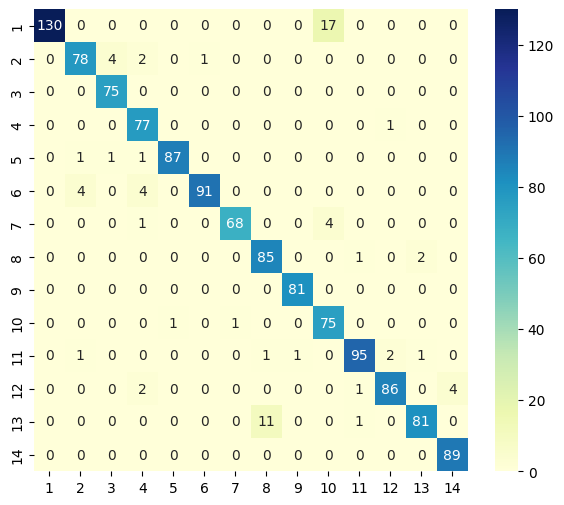

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.88      0.94       147
           2       0.93      0.92      0.92        85
           3       0.94      1.00      0.97        75
           4       0.89      0.99      0.93        78
           5       0.99      0.97      0.98        90
           6       0.99      0.92      0.95        99
           7       0.99      0.93      0.96        73
           8       0.88      0.97      0.92        88
           9       0.99      1.00      0.99        81
          10       0.78      0.97      0.87        77
          11       0.97      0.94      0.95       101
          12       0.97      0.92      0.95        93
          13       0.96      0.87      0.92        93
          14       0.96      1.00      0.98        89

    accuracy                           0.94      1269
   macro avg       0.94      0.95      0.94      1269
weighted avg       0.95      0.94      0.94      1269



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False, cmap="YlGnBu")
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert Model for Tensorflow-Lite

In [25]:
# Save as a model dedicated to inference

model.save(model_save_path, include_optimizer=False)

In [26]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\laurs\AppData\Local\Temp\tmpjy0idmkm\assets


INFO:tensorflow:Assets written to: C:\Users\laurs\AppData\Local\Temp\tmpjy0idmkm\assets


7028

# Inference Test

In [27]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [28]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [29]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [30]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.0602864e-13 4.0641879e-03 2.6400504e-03 5.7750619e-03 2.3982665e-02
 9.0193200e-01 2.4316296e-02 2.3387030e-03 1.0203704e-07 1.9147214e-08
 3.4756634e-02 1.5201919e-04 9.3163845e-07 4.0775296e-05 5.0288753e-07]
5
